<img src="fifa2020.png">



<h1><center>Aprendizaje No Supervisado 2020 - DiploDatos</center></h1>

<h4><center>Lucas Lisandrello, Emanuel Matar, Emiliano Olivares y Matias Ugrin.</center></h4>

In [2]:
import numpy as np
import pandas as pd
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode()
#init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## Primeros pasos

Lectura del db y primeras visualizaciones

In [3]:
dataframe = pd.read_csv("archive/players_20.csv")

display(dataframe.sample(5))
print(f"Veamos algunas características de los datos. Los tipos de datos de cada columna son: {dataframe.dtypes}")
print(f"Veamos una descripción de las columnas: ")
pd.set_option('display.max_columns', None)
display(dataframe.describe(include = 'all'))

sofifa_id                                         player_url  \
17113     241428  https://sofifa.com/player/241428/harvey-knibbs...   
10339     245785  https://sofifa.com/player/245785/shinnosuke-ha...   
11457     219983  https://sofifa.com/player/219983/umberto-sarac...   
10367     213635  https://sofifa.com/player/213635/tom-lapslie/2...   
16403     240669  https://sofifa.com/player/240669/lennard-malon...   

        short_name        long_name  age         dob  height_cm  weight_kg  \
17113    H. Knibbs    Harvey Knibbs   20  1999-04-26        180         75   
10339  S. Hatanaka           畠中 槙之輔   23  1995-08-25        184         80   
11457   U. Saracco  Umberto Saracco   25  1994-04-10        190         83   
10367   T. Lapslie      Tom Lapslie   23  1995-10-05        168         69   
16403   L. Maloney  Lennard Maloney   19  1999-10-08        187         89   

      nationality                 club  ...   lwb   ldm   cdm   rdm   rwb  \
17113     England     Cambridge United  ...  35+2  32+2  32+2  32+2  35+2   
10339       Japan  Yokohama F. Marinos  ...  58+2  60+2  60+2  60+2  58+2   
11457       Italy              Cosenza  ...   NaN   NaN   NaN   NaN   NaN   
10367     England    Colchester United  ...  62+2  64+2  64+2  64+2  62+2   
16403     Germany   1. FC Union Berlin  ...  54+2  55+2  55+2  55+2  54+2   

         lb   lcb    cb   rcb    rb  
17113  34+2  30+2  30+2  30+2  34+2  
10339  60+2  63+2  63+2  63+2  60+2  
11457   NaN   NaN   NaN   NaN   NaN  
10367  62+2  64+2  64+2  64+2  62+2  
16403  54+2  56+2  56+2  56+2  54+2  

[5 rows x 104 columns]

Veamos algunas características de los datos. Los tipos de datos de cada columna son: sofifa_id      int64
player_url    object
short_name    object
long_name     object
age            int64
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 104, dtype: object
Veamos una descripción de las columnas: 


sofifa_id                                         player_url  \
count    18278.000000                                              18278   
unique            NaN                                              18278   
top               NaN  https://sofifa.com/player/204785/mikael-mandro...   
freq              NaN                                                  1   
mean    219738.864482                                                NaN   
std      27960.200461                                                NaN   
min        768.000000                                                NaN   
25%     204445.500000                                                NaN   
50%     226165.000000                                                NaN   
75%     240795.750000                                                NaN   
max     252905.000000                                                NaN   

          short_name   long_name           age         dob     height_cm  \
count          18278       18278  18278.000000       18278  18278.000000   
unique         17354       18218           NaN        6142           NaN   
top     J. Rodríguez  Liam Kelly           NaN  1992-02-29           NaN   
freq              11           3           NaN         113           NaN   
mean             NaN         NaN     25.283291         NaN    181.362184   
std              NaN         NaN      4.656964         NaN      6.756961   
min              NaN         NaN     16.000000         NaN    156.000000   
25%              NaN         NaN     22.000000         NaN    177.000000   
50%              NaN         NaN     25.000000         NaN    181.000000   
75%              NaN         NaN     29.000000         NaN    186.000000   
max              NaN         NaN     42.000000         NaN    205.000000   

           weight_kg nationality     club       overall     potential  \
count   18278.000000       18278    18278  18278.000000  18278.000000   
unique           NaN         162      698           NaN           NaN   
top              NaN     England  Chelsea           NaN           NaN   
freq             NaN        1667       33           NaN           NaN   
mean       75.276343         NaN      NaN     66.244994     71.546887   
std         7.047744         NaN      NaN      6.949953      6.139669   
min        50.000000         NaN      NaN     48.000000     49.000000   
25%        70.000000         NaN      NaN     62.000000     67.000000   
50%        75.000000         NaN      NaN     66.000000     71.000000   
75%        80.000000         NaN      NaN     71.000000     75.000000   
max       110.000000         NaN      NaN     94.000000     95.000000   

           value_eur       wage_eur player_positions preferred_foot  \
count   1.827800e+04   18278.000000            18278          18278   
unique           NaN            NaN              643              2   
top              NaN            NaN               CB          Right   
freq             NaN            NaN             2322          13960   
mean    2.484038e+06    9456.942773              NaN            NaN   
std     5.585481e+06   21351.714095              NaN            NaN   
min     0.000000e+00       0.000000              NaN            NaN   
25%     3.250000e+05    1000.000000              NaN            NaN   
50%     7.000000e+05    3000.000000              NaN            NaN   
75%     2.100000e+06    8000.000000              NaN            NaN   
max     1.055000e+08  565000.000000              NaN            NaN   

        international_reputation     weak_foot   skill_moves      work_rate  \
count               18278.000000  18278.000000  18278.000000          18278   
unique                       NaN           NaN           NaN              9   
top                          NaN           NaN           NaN  Medium/Medium   
freq                         NaN           NaN           NaN           9875   
mean                    1.103184      2.944250      2.368038 

# Comenzamos con pequeña curación de datos

## Duplicados

In [4]:
# Lineas duplicadas

display(dataframe[dataframe.duplicated()])
display(dataframe[dataframe.index.duplicated()])

Empty DataFrame
Columns: [sofifa_id, player_url, short_name, long_name, age, dob, height_cm, weight_kg, nationality, club, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, international_reputation, weak_foot, skill_moves, work_rate, body_type, real_face, release_clause_eur, player_tags, team_position, team_jersey_number, loaned_from, joined, contract_valid_until, nation_position, nation_jersey_number, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, player_traits, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking, defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, ...]
Index: []

Empty DataFrame
Columns: [sofifa_id, player_url, short_name, long_name, age, dob, height_cm, weight_kg, nationality, club, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, international_reputation, weak_foot, skill_moves, work_rate, body_type, real_face, release_clause_eur, player_tags, team_position, team_jersey_number, loaned_from, joined, contract_valid_until, nation_position, nation_jersey_number, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, player_traits, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking, defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, ...]
Index: []

In [5]:
# Caracteres extraños (fuera de ascii)

dataframe.columns[~dataframe.columns.str.match(r'^(\w+)$')]

Index([], dtype='object')

In [6]:
columnas = dataframe.columns
for p in columnas:
    print(p)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

In [7]:
#Cantidad relativa de datos
print(f"Shape del dataframe: {dataframe.shape}")
print(f"Shape del dataframe sin na {dataframe.dropna()}")


len(dataframe.dropna())/len(dataframe)

Shape del dataframe: (18278, 104)
Shape del dataframe sin na Empty DataFrame
Columns: [sofifa_id, player_url, short_name, long_name, age, dob, height_cm, weight_kg, nationality, club, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, international_reputation, weak_foot, skill_moves, work_rate, body_type, real_face, release_clause_eur, player_tags, team_position, team_jersey_number, loaned_from, joined, contract_valid_until, nation_position, nation_jersey_number, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, player_traits, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_stren

0.0

## Hay muchos nulos referidos a data categorica que no es relevante. Además, hay que diferenciar los datos de arqueros.

In [8]:
#Nos quedamos con los skills
skills_ratings = ["pace", "shooting", "passing", "dribbling", "defending", "physic",
                  "gk_diving", "gk_handling", "gk_kicking", "gk_reflexes", "gk_speed", "gk_positioning", 
                  #"player", 
                  "attacking_crossing", "attacking_finishing", "attacking_heading_accuracy", "attacking_short_passing", "attacking_volleys",
                  "skill_dribbling", "skill_curve", "skill_fk_accuracy", "skill_long_passing", "skill_ball_control", "movement_acceleration",
                  "movement_sprint_speed", "movement_agility", "movement_reactions", "movement_balance", "power_shot_power", "power_jumping",
                  "power_stamina", "power_strength", "power_long_shots", "mentality_aggression", "mentality_interceptions", "mentality_positioning",
                  "mentality_vision", "mentality_penalties", "mentality_composure", "defending_marking", "defending_standing_tackle", "defending_sliding_tackle",
                  "goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning", "goalkeeping_reflexes", 
                  "overall"
                  ]
#Dejamos, de momento, fuera los siguientes:
#"ls", "st", "rs", "lw", "lf", "cf", "rf",
                  #"rw", "lam", "cam", "ram", "lm", "lcm",
                  #"cm", "rcm", "rm", "lwb", "ldm", "cdm",
                  #"rdm", "rwb", "lb", "lcb", "cb", "rcb", "rb"

pd.set_option('display.max_columns', None)
dataframe_skills=dataframe[skills_ratings]
dataframe_skills.sample(5)

pace  shooting  passing  dribbling  defending  physic  gk_diving  \
1999   73.0      69.0     74.0       78.0       71.0    70.0        NaN   
17713  54.0      23.0     30.0       31.0       53.0    64.0        NaN   
4973    NaN       NaN      NaN        NaN        NaN     NaN       73.0   
10779  76.0      53.0     61.0       68.0       60.0    62.0        NaN   
4626   73.0      68.0     71.0       71.0       53.0    67.0        NaN   

       gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
1999           NaN         NaN          NaN       NaN             NaN   
17713          NaN         NaN          NaN       NaN             NaN   
4973          62.0        67.0         75.0      43.0            66.0   
10779          NaN         NaN          NaN       NaN             NaN   
4626           NaN         NaN          NaN       NaN             NaN   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
1999                   67                   62                          58   
17713                  20                   20                          47   
4973                   11                   10                          10   
10779                  63                   43                          52   
4626                   67                   68                          57   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
1999                        80                 65               79   
17713                       35                 20               25   
4973                        24                 18               15   
10779                       63                 49               66   
4626                        73                 62               70   

       skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
1999            76                 72                  76                  79   
17713           26                 23                  28                  30   
4973            12                 12                  22                  15   
10779           57                 59                  62                  67   
4626            71                 72                  68                  73   

       movement_acceleration  movement_sprint_speed  movement_agility  \
1999                      75                     72                74   
17713                     52                     55                44   
4973                      45                     42                30   
10779                     77                     75                75   
4626                      77                     70                70   

       movement_reactions  movement_balance  power_shot_power  power_jumping  \
1999                   66                77                82             56   
17713                  41                62                30             68   
4973                   68                56                50             56   
10779                  61                80                69             66   
4626                   67                70                66             52   

       power_stamina  power_strength  power_long_shots  mentality_aggression  \
1999              74              65                72                    79   
17713             62              68                18                    55   
4973              33              64                14                    20   
10779             76              57                64                    54   
4626              76              68                70                    57   

       mentality_interceptions  mentality_positioning  mentality_vision  \
1999                        76                     66                71   
17713                       51                     22                33   
4973                        29                     12                58   
10779                       59         

## Tratamiento de NaN

Tomaremos dos estrategias: imputar a 0 los datos sobre arqueros para jugadores no arqueros, esto debería permitirnos identificar facilmente los arqueros y trabajar sobre el resto de valores nulos imputando medias o medianas.

In [9]:
# get the number of missing data points per column
missing_values_count = dataframe_skills.isna().sum()

# look at the # of missing points in the first ten columns
missing_values_count[missing_values_count > 0]

pace               2036
shooting           2036
passing            2036
dribbling          2036
defending          2036
physic             2036
gk_diving         16242
gk_handling       16242
gk_kicking        16242
gk_reflexes       16242
gk_speed          16242
gk_positioning    16242
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
df_copy = dataframe_skills.copy(deep=True)
display(df_copy.sample(3))

mean_imputer = SimpleImputer(strategy = "mean")
median_imputer = SimpleImputer(strategy = "median")
o_imputer = SimpleImputer(strategy = "constant", fill_value=0)

df_gks = df_copy.iloc[:, 6:12]
df_gks = o_imputer.fit_transform(df_gks)

df_others = df_copy.iloc[:, 0:6]
df_others = mean_imputer.fit_transform(df_others)

dataframe_skills.iloc[:, 6:12] = df_gks
dataframe_skills.iloc[:, 0:6] = df_others
display(dataframe_skills.head(3))
print(dataframe_skills.shape)
#print(dataframe_skills.isnull().sum())

pace  shooting  passing  dribbling  defending  physic  gk_diving  \
16597   NaN       NaN      NaN        NaN        NaN     NaN       60.0   
163    89.0      81.0     72.0       86.0       41.0    71.0        NaN   
5722   75.0      61.0     63.0       70.0       65.0    70.0        NaN   

       gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
16597         55.0        54.0         59.0      37.0            57.0   
163            NaN         NaN          NaN       NaN             NaN   
5722           NaN         NaN          NaN       NaN             NaN   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
16597                  11                    7                          12   
163                    72                   82                          69   
5722                   50                   54                          58   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
16597                       26                  8                9   
163                         78                 74               87   
5722                        71                 40               69   

       skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
16597           11                 10                  22                  11   
163             84                 54                  60                  86   
5722            49                 42                  66                  69   

       movement_acceleration  movement_sprint_speed  movement_agility  \
16597                     31                     42                31   
163                       88                     89                84   
5722                      76                     75                74   

       movement_reactions  movement_balance  power_shot_power  power_jumping  \
16597                  44                38                41             54   
163                    80                79                84             70   
5722                   68                73                72             57   

       power_stamina  power_strength  power_long_shots  mentality_aggression  \
16597             22              48                 6                    24   
163               75              74                77                    58   
5722              70              73                68                    65   

       mentality_interceptions  mentality_positioning  mentality_vision  \
16597                       12                      6                39   
163                         42                     82                73   
5722                        69                     62                66   

       mentality_penalties  mentality_composure  defending_marking  \
16597                   19                   41                 11   
163                     81                   79                 34   
5722                    64                   69                 63   

       defending_standing_tackle  defending_sliding_tackle  \
16597                         11                        10   
163                           39                        36   
5722                          68                        65   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
16597                  60                    55                   54   
163                     9                     8                    8   
5722                   12                     7                   12   

       goalkeeping_positioning  goalkeeping_reflexes  overall  
16597                       57                    59       57  
163                         15                    11       83  
5722                         5                     9       69

pace  shooting  passing  dribbling  defending  physic  gk_diving  \
0  87.0      92.0     92.0       96.0       39.0    66.0        0.0   
1  90.0      93.0     82.0       89.0       35.0    78.0        0.0   
2  91.0      85.0     87.0       95.0       32.0    58.0        0.0   

   gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
0          0.0         0.0          0.0       0.0             0.0   
1          0.0         0.0          0.0       0.0             0.0   
2          0.0         0.0          0.0       0.0             0.0   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  88                   95                          70   
1                  84                   94                          89   
2                  87                   87                          62   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       92                 88               97           93   
1                       83                 87               89           81   
2                       87                 87               96           88   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 94                  92                  96   
1                 76                  77                  92   
2                 87                  81                  95   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     91                     84                93   
1                     89                     91                87   
2                     94                     89                96   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                  95                95                86             68   
1                  96                71                95             95   
2                  92                84                80             61   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0             75              68                94                    48   
1             85              78                93                    63   
2             81              49                84                    51   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   
1                       29                     95                82   
2                       36                     87                90   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   
1                   85                   95                 28   
2                   90                   94                 27   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         37                        26                   6   
1                         32                        24                   7   
2                         26                        29                   9   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   
1                    11                   15                       14   
2                     9                   15                       15   

   goalkeeping_reflexes  overall  
0                     8       94  
1                    11       93  
2                    11       92

(18278, 47)


In [12]:
dataframe_skills.shape

(18278, 47)

In [13]:
n=10000 #cantidad de jugadores a considerar

dataframe_n=dataframe_skills.loc[:n] #se reduce la base a los n primeros jugadores

dataframe_n=dataframe_skills[(dataframe_skills['overall']>70)]

dataframe_n.shape
dataframe_n.sample(1)

pace  shooting  passing  dribbling  defending  physic  gk_diving  \
3677  68.0      42.0     45.0       48.0       72.0    76.0        0.0   

      gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
3677          0.0         0.0          0.0       0.0             0.0   

      attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
3677                  38                   47                          77   

      attacking_short_passing  attacking_volleys  skill_dribbling  \
3677                       57                 33               45   

      skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
3677           29                 25                  53                  48   

      movement_acceleration  movement_sprint_speed  movement_agility  \
3677                     64                     71                62   

      movement_reactions  movement_balance  power_shot_power  power_jumping  \
3677                  71                33                38             74   

      power_stamina  power_strength  power_long_shots  mentality_aggression  \
3677             69              87                40                    57   

      mentality_interceptions  mentality_positioning  mentality_vision  \
3677                       70                     39                35   

      mentality_penalties  mentality_composure  defending_marking  \
3677                   34                   58                 71   

      defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
3677                         74                        71                   8   

      goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
3677                    11                   15                        6   

      goalkeeping_reflexes  overall  
3677                     8       72

In [55]:
dataframe_skills

pace   shooting    passing  dribbling  defending     physic  \
0      87.000000  92.000000  92.000000  96.000000  39.000000  66.000000   
1      90.000000  93.000000  82.000000  89.000000  35.000000  78.000000   
2      91.000000  85.000000  87.000000  95.000000  32.000000  58.000000   
3      67.700899  52.298301  57.233777  62.531585  51.553503  64.876678   
4      91.000000  83.000000  86.000000  94.000000  35.000000  66.000000   
...          ...        ...        ...        ...        ...        ...   
18273  57.000000  23.000000  28.000000  33.000000  47.000000  51.000000   
18274  58.000000  24.000000  33.000000  35.000000  48.000000  48.000000   
18275  54.000000  35.000000  44.000000  45.000000  48.000000  51.000000   
18276  59.000000  35.000000  47.000000  47.000000  45.000000  52.000000   
18277  60.000000  32.000000  51.000000  45.000000  47.000000  55.000000   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                      88                   95                          70   
1                      84                   94                          89   
2                      87                   87                          62   
3                      13                   11                          15   
4                      81                   84                          61   
...                   ...                  ...                         ...   
18273                  21                   17                          40   
18274                  24                   20                          42   
18275                  32                   33                          49   
18276                  39                   34                          47   
18277                  44                   30                          48   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
0                           92                 88               97   
1                           83                 87               89   
2                           87                 87               96   
3                           43                 13               12   
4                           89                 83               95   
...                        ...                ...              ...   
18273                       35                 27               24   
18274                       43                 28               32   
18275                       53                 32               40   
18276                       54                 28               42   
18277                       58                 25               40   

       skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0               93                 94                  92                  96   
1               81                 76                  77                  92   
2               88                 87                  81                  95   
3               13                 14                  40                  30   
4               83                 79                  83                  94   
...            ...                ...                 ...                 ...   
18273           23                 21                  28                  35   
18274           24                 29                  39                  31   
18275           32                 32                  55                  49   
18276           37                 39                  48                  49   
18277           34                 35                  52                  46   

       movement_acceleration  movement_sprint_speed  movement_agility  \
0                         91                     84                93   
1                         89                     91                87   
2                         94                     89                96   
3                         43                     60                6

## Exploratorio Visual para Clustering

In [68]:
data=[]
bool_crack=dataframe["overall"] > 85 #diferenciamos a los mejores jugadores

#Elejimos dos variables, para esto elejimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[1]
skill_2=skills_ratings[13]



graf1 = go.Scatter(x=dataframe_skills[skill_1], y=dataframe_skills[skill_2],
                           mode='markers',
                        text=dataframe.loc[:,'club'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=dataframe_skills.loc[bool_crack,skill_1], y=dataframe_skills.loc[bool_crack,skill_2],name='Top players',
                      text=dataframe.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=800,height=800)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [59]:
MachineGunDict={'short_name':'MachineGun','overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99
    
dataframe=dataframe.append(MachineGunDict,ignore_index=True)

In [67]:
#Gráfico 2

#Elegimos un jugador
recherche_joueur=(dataframe["short_name"]=='L. Suárez') & (dataframe["nationality"]=='Uruguay')
recherche_joueur2=(dataframe["short_name"]=='L. Messi') 
#recherche_joueur=df_n["Name"]==df_n["Name"][4000] # acá podemos elegir otro 


bool_crack=dataframe["overall"] > 85
bool_elecc=dataframe["club"]=='FC Barcelona' 
#bool_elecc=df_n["Position"]=='GK' #arqueros
bool_no_crack=dataframe["overall"]<86
bool_machinegun=dataframe["short_name"]=='MachineGun'

#Elegir dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[1]  #6
skill_2=skills_ratings[13]  #25


palette=['navy','red','#A2D5F2','orange','green','pink']  

data=[]

n_crack =go.Scatter(x=dataframe_skills.loc[bool_crack,skill_1], y=dataframe_skills.loc[bool_crack,skill_2],name='Crack',
                      text=dataframe.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

n_no_crack =go.Scatter(x=dataframe_skills.loc[bool_no_crack,skill_1], y=dataframe_skills.loc[bool_no_crack,skill_2],name='Average player',
                         text=dataframe.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')
n_elecc=go.Scatter(x=dataframe_skills.loc[bool_elecc,skill_1], y=dataframe_skills.loc[bool_elecc,skill_2],name='Elección',
                         text=dataframe.loc[bool_elecc,'short_name'],
                         opacity=0.6,marker=dict(color=palette[0],size=5),mode='markers')

n_machinegun =go.Scatter(x=dataframe.loc[bool_machinegun,skill_1], y=dataframe.loc[bool_machinegun,skill_2],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


joueur_recherche =go.Scatter(x=dataframe_skills.loc[recherche_joueur,skill_1], y=dataframe_skills.loc[recherche_joueur,skill_2],name='Searched player',
                           text=dataframe.loc[recherche_joueur,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

joueur_recherche2 =go.Scatter(x=dataframe_skills.loc[recherche_joueur2,skill_1], y=dataframe_skills.loc[recherche_joueur2,skill_2],name='Searched player',
                           text=dataframe.loc[recherche_joueur2,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[5],size=40),mode='markers+text')

data=[n_no_crack,n_elecc
      ,n_crack,n_machinegun,joueur_recherche,joueur_recherche2]

layout = go.Layout(title="Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=800,height=800)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

# CLUSTERING

In [14]:
#Vamos a usar el dataset reducido y menor cantidad de features para la predicción
#Probamos con ataque y defensa
dataframe_k = dataframe_n.copy()
dataframe_k = dataframe_n[["shooting", "attacking_finishing"]]
dataframe_k.sample(1)

shooting  attacking_finishing
1852      66.0                   63

## Kmeans

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

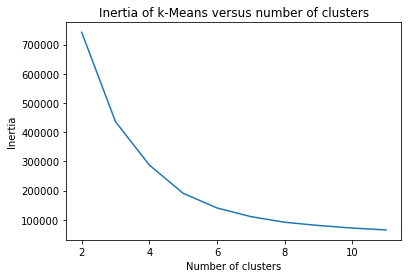

In [15]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i+2).fit(dataframe_k).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [16]:
n_clusters=5
kmeans = KMeans(init="random", 
                n_clusters= n_clusters,
                n_init=5,
                max_iter=300,
                random_state=42
               )

In [17]:
kmeans.fit(dataframe_k)

clusters = kmeans.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', kmeans.inertia_)

#print("Zona de los centroides", kmeans.cluster_centers_)

#print("Iteraciones", kmeans.n_iter_)

Suma de los cuadrados de las distancias al cluster / Inertia:  191126.93316997358


In [18]:
from sklearn.metrics import silhouette_score

score = silhouette_score (dataframe_k, kmeans.labels_, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score}")

For n_clusters = 5, silhouette score is 0.5057383431487484


from sklearn.metrics import silhouette_score

score = silhouette_score (dataframe_n, kmeans.labels_, metric='euclidean')
print (f"For n_clusters = 4, silhouette score is {score}")

In [19]:
df_clusters_k=dataframe_k.copy()
df_clusters_k['kmeans'] = kmeans.labels_

df_clusters_k.sample(3)

shooting  attacking_finishing  kmeans
4416      59.0                   57       1
1434      73.0                   71       0
252       39.0                   33       4

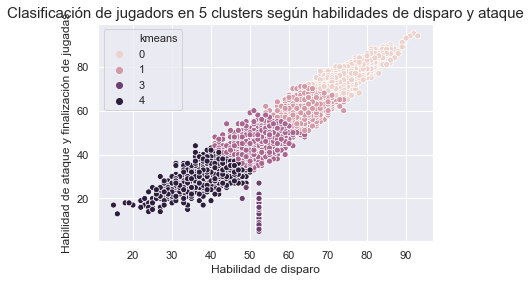

In [20]:
sns.set(context="notebook")

g = sns.scatterplot(data=df_clusters_k, x="shooting", y="attacking_finishing", hue="kmeans")

plt.ylabel('Habilidad de ataque y finalización de jugadas', fontdict={'fontsize': 12})
plt.xlabel('Habilidad de disparo', fontdict={'fontsize': 12})
plt.title('Clasificación de jugadors en 5 clusters según habilidades de disparo y ataque', fontdict={'fontsize': 15})
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

## DB SCAN

In [21]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.1, min_samples=10)

In [22]:
db.fit(dataframe_k)

DBSCAN(eps=0.1, min_samples=10)

In [23]:
df_clusters_db = dataframe_k.copy()
df_clusters_db['Dbscan'] = db.labels_
labels = db.labels_

df_clusters_db.sample(3)

shooting  attacking_finishing  Dbscan
715   42.000000                   37      -1
1300  52.298301                   18      16
2698  38.000000                   32      -1

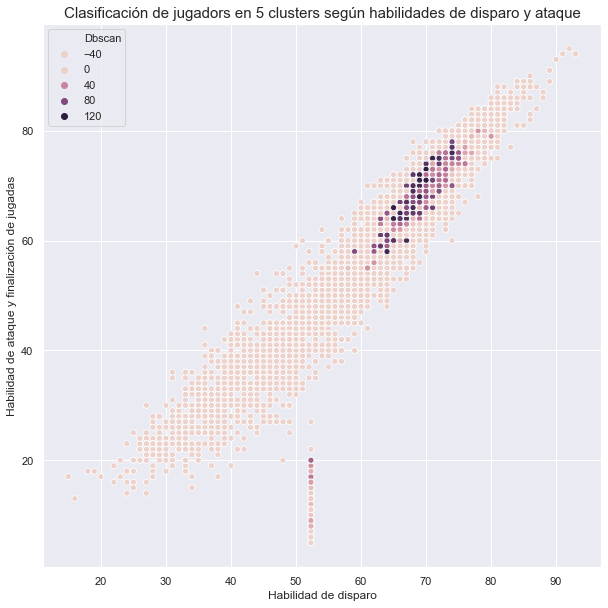

In [24]:
sns.set(context="notebook")

g = sns.scatterplot(data=df_clusters_db, x="shooting", y="attacking_finishing", hue="Dbscan")

plt.ylabel('Habilidad de ataque y finalización de jugadas', fontdict={'fontsize': 12})
plt.xlabel('Habilidad de disparo', fontdict={'fontsize': 12})
plt.title('Clasificación de jugadors en 5 clusters según habilidades de disparo y ataque', fontdict={'fontsize': 15})
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

Segun lo visto en clases, DBSCAN tiende a fallar cuando los datos se encuentran muy continuados, era de esperarse ya que trabaja con densidades de puntos 
y distancias

## WARD LINKAGE

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
n_clusters = 4  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

In [27]:
ward.fit(dataframe_k)

AgglomerativeClustering(n_clusters=4)

In [28]:
df_clusters_wl = dataframe_k.copy()
df_clusters_wl['Ward'] = ward.labels_
labels = ward.labels_

df_clusters_wl.sample(3)

shooting  attacking_finishing  Ward
136       55.0                   43     0
1903      40.0                   40     1
2375      73.0                   67     0

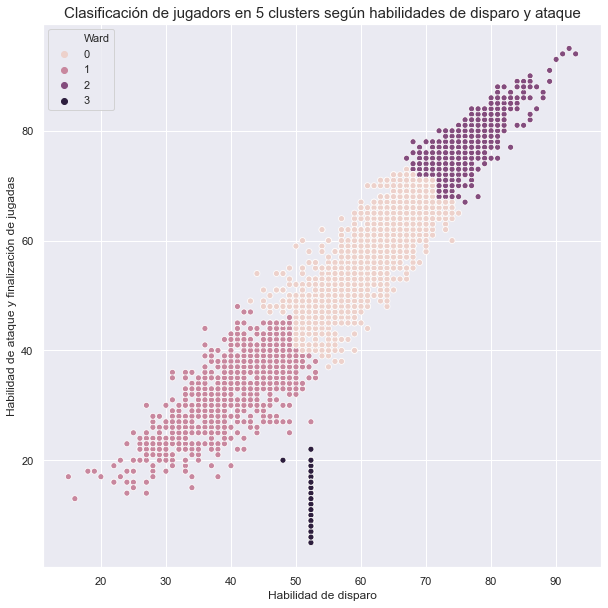

In [29]:
sns.set(context="notebook")

g = sns.scatterplot(data=df_clusters_wl, x="shooting", y="attacking_finishing", hue="Ward")

plt.ylabel('Habilidad de ataque y finalización de jugadas', fontdict={'fontsize': 12})
plt.xlabel('Habilidad de disparo', fontdict={'fontsize': 12})
plt.title('Clasificación de jugadors en 5 clusters según habilidades de disparo y ataque', fontdict={'fontsize': 15})
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

Tiende a juntar los outliers como un cluster mas

# Embedings

## PCA

In [30]:
from sklearn.preprocessing import StandardScaler

StdS = StandardScaler()
StdS.fit(dataframe_skills)

dataframe_scaled = StdS.transform(dataframe_skills)
dataframe_scaled = pd.DataFrame(dataframe_scaled, columns=[skills_ratings])
#dataframe_scaled = dataframe_scaled.drop(columns=['gk_diving', 'gk_handling', "gk_kicking", "gk_reflexes", "gk_speed", "gk_positioning" ])
dataframe_scaled.sample(3)

Acá hay que ver si es necesario escalar o no. En realidad el escalamiento es necesario si los datos tienen rangos de valores diferentes (acá van todos de 0 a 100, quizas no hace falta).
Dejo la implementación arriba igual

In [31]:
from sklearn.decomposition import PCA

dataframe_skills = dataframe_skills.drop(columns=["gk_diving", "gk_handling", "gk_kicking", "gk_reflexes", "gk_speed", "gk_positioning"])

pca = PCA(n_components=5)
pca.fit(dataframe_scaled)

In [32]:
pca = PCA(n_components=5)
pca.fit(dataframe_skills)

PCA(n_components=5)

In [33]:
dataframe_pca = pca.transform(dataframe_skills)
print(dataframe_pca.shape)
dataframe_pca = pd.DataFrame(dataframe_pca, columns=["A", "B", "C", "D", "E"])
dataframe_pca.sample(5)

(18278, 5)


A          B          C          D          E
13346 -11.602663  28.928124  -9.306939  -7.874986   2.723552
1250  -70.427714 -70.116145  21.077602  -5.892523  -0.577187
4573  -45.330770 -85.180963  -5.982389 -22.731954 -14.208168
7808  -29.850199 -42.376779 -16.109477 -10.090055 -12.644183
8059   -4.863587  58.011158 -14.460999 -24.602560 -21.414833

In [34]:
n_clusters=5
kmeans = KMeans(init="random", 
                n_clusters= n_clusters,
                n_init=5,
                max_iter=300,
                random_state=42
               )

In [35]:
kmeans.fit(dataframe_pca)

clusters = kmeans.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', kmeans.inertia_)

#print("Zona de los centroides", kmeans.cluster_centers_)

#print("Iteraciones", kmeans.n_iter_)

Suma de los cuadrados de las distancias al cluster / Inertia:  34371168.06025756


In [36]:
dataframe_pca=dataframe_pca.copy()
dataframe_pca['kmeans'] = kmeans.labels_

In [37]:
from sklearn.metrics import silhouette_score

score = silhouette_score (dataframe_pca, kmeans.labels_, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score}")

For n_clusters = 5, silhouette score is 0.3538979606409349


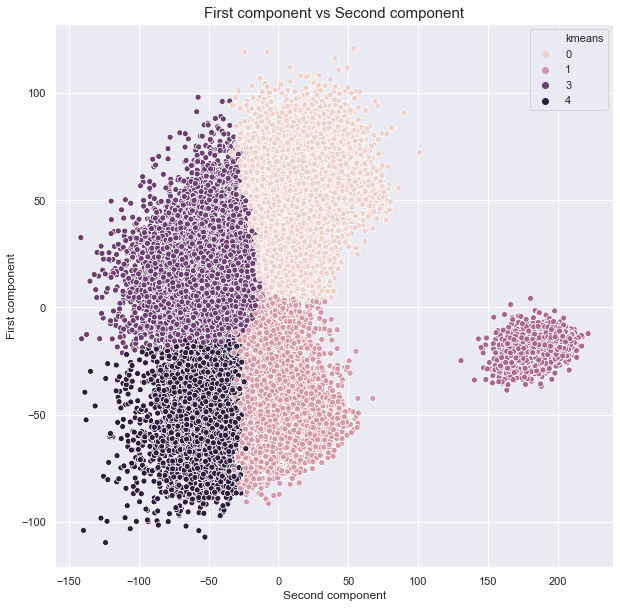

In [38]:
sns.set(context="notebook")

g = sns.scatterplot(data=dataframe_pca, x="A", y="B", hue="kmeans")

plt.ylabel('First component', fontdict={'fontsize': 12})
plt.xlabel('Second component', fontdict={'fontsize': 12})
plt.title('First component vs Second component', fontdict={'fontsize': 15})
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

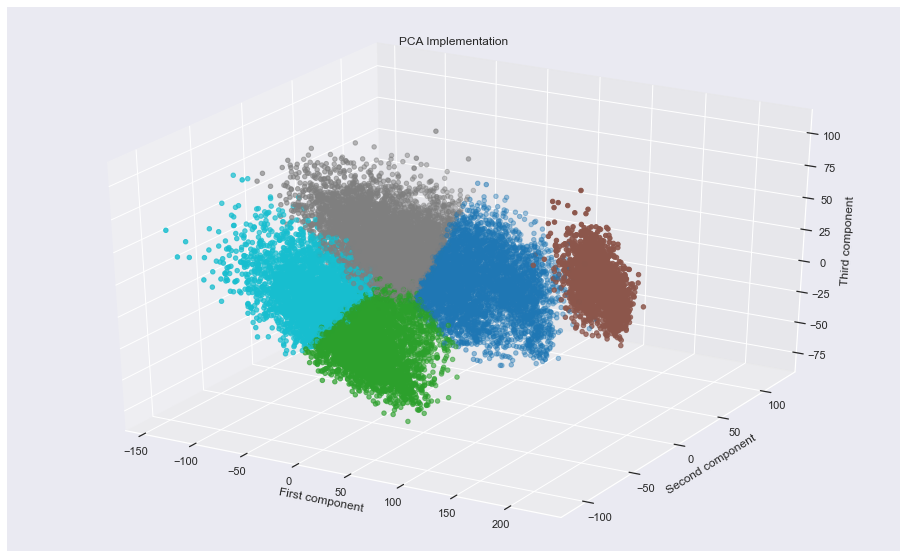

In [39]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dataframe_pca["A"], 
    ys=dataframe_pca["B"], 
    zs=dataframe_pca["C"], 
    c=dataframe_pca["kmeans"], 
    cmap='tab10'
)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
ax.set_zlabel('Third component')
ax.set_title('PCA Implementation')
plt.show()

## tsne

In [40]:
display(dataframe_skills.sample(3))

pace  shooting  passing  dribbling  defending  physic  \
3653   71.0      67.0     70.0       76.0       37.0    57.0   
16925  65.0      56.0     50.0       59.0       22.0    63.0   
7923   57.0      45.0     54.0       59.0       65.0    67.0   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
3653                   60                   67                          46   
16925                  50                   60                          48   
7923                   41                   38                          68   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
3653                        76                 44               76   
16925                       55                 53               57   
7923                        66                 38               56   

       skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
3653            60                 56                  72                  77   
16925           49                 37                  44                  58   
7923            43                 41                  59                  66   

       movement_acceleration  movement_sprint_speed  movement_agility  \
3653                      73                     69                73   
16925                     64                     66                68   
7923                      51                     62                49   

       movement_reactions  movement_balance  power_shot_power  power_jumping  \
3653                   71                74                73             50   
16925                  50                66                58             52   
7923                   64                52                62             66   

       power_stamina  power_strength  power_long_shots  mentality_aggression  \
3653              64              61                70                    42   
16925             65              65                47                    57   
7923              64              69                46                    68   

       mentality_interceptions  mentality_positioning  mentality_vision  \
3653                        28                     68                72   
16925                       11                     58                47   
7923                        66                     39                47   

       mentality_penalties  mentality_composure  defending_marking  \
3653                    56                   68                 44   
16925                   41                   60                 16   
7923                    48                   65                 63   

       defending_standing_tackle  defending_sliding_tackle  \
3653                          34                        31   
16925                         27                        16   
7923                          66                        66   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
3653                   14                    16                   14   
16925                  12                    10                   12   
7923                    7                    15                    9   

       goalkeeping_positioning  goalkeeping_reflexes  overall  
3653                        15                    16       72  
16925                       12                    12       56  
7923                        14                     6       67

In [41]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)

In [42]:
tsne_obj= tsne.fit_transform(dataframe_skills)

In [43]:
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1]})
tsne_df.head()

X          Y
0 -36.830379  44.518375
1 -39.439434  43.487823
2 -36.771309  44.477451
3 -13.171014 -76.443535
4 -36.822739  44.434162

In [44]:
n_clusters=5
kmeans = KMeans(init="random", 
                n_clusters= n_clusters,
                n_init=5,
                max_iter=300,
                random_state=42
               )

In [45]:
kmeans.fit(tsne_df)

clusters = kmeans.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', kmeans.inertia_)

#print("Zona de los centroides", kmeans.cluster_centers_)

#print("Iteraciones", kmeans.n_iter_)

Suma de los cuadrados de las distancias al cluster / Inertia:  7159997.0


In [46]:
tsne_df = tsne_df.copy()
tsne_df['kmeans'] = kmeans.labels_

In [47]:
from sklearn.metrics import silhouette_score

score = silhouette_score (tsne_df, kmeans.labels_, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score}")

For n_clusters = 5, silhouette score is 0.4345397182311399


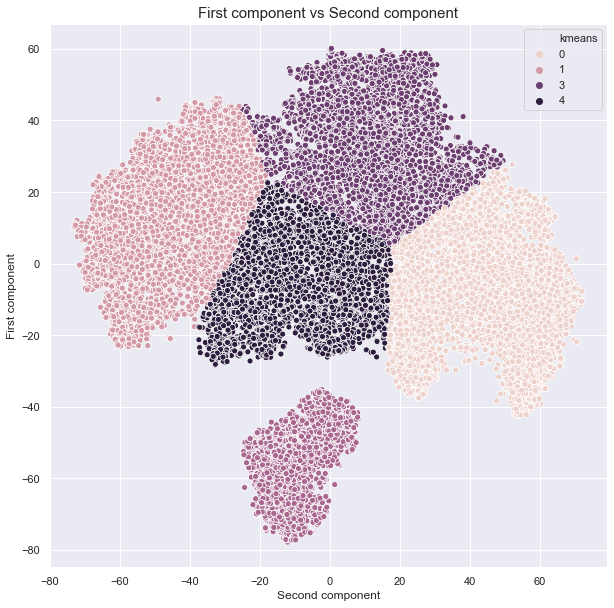

In [48]:
sns.set(context="notebook")

g = sns.scatterplot(data=tsne_df, x="X", y="Y", hue="kmeans")

plt.ylabel('First component', fontdict={'fontsize': 12})
plt.xlabel('Second component', fontdict={'fontsize': 12})
plt.title('First component vs Second component', fontdict={'fontsize': 15})
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

La base de datos no requiere normalización. En general, se considera requisito la normalización para los algoritmos de clustering cuando se cuenta con variables cuyos rangos son diferentes para con esto evitar que unas features no tengan mas peso que otras en el procesamiento. En nuestro caso, las features toman valores entre 0 y 100, por lo que se pueden considerar "normalizadas" o bajo la misma escala.